In [5]:
import torch
# 定义变量x1和x2，并设置requires_grad=True
x1 = torch.tensor(0.0, requires_grad=True)
x2 = torch.tensor(1.0, requires_grad=True)

# 构建计算图
sigmoid = torch.sigmoid
y = sigmoid(3 * sigmoid(x1**2 + 2*x2 + 1) + sigmoid(x1**2 + 2*x2 + 1) + 1)

# 计算梯度
y.backward()

# 打印梯度
print("Gradient for x1:", x1.grad)
print("Gradient for x2:", x2.grad)

Gradient for x1: tensor(0.)
Gradient for x2: tensor(0.0029)


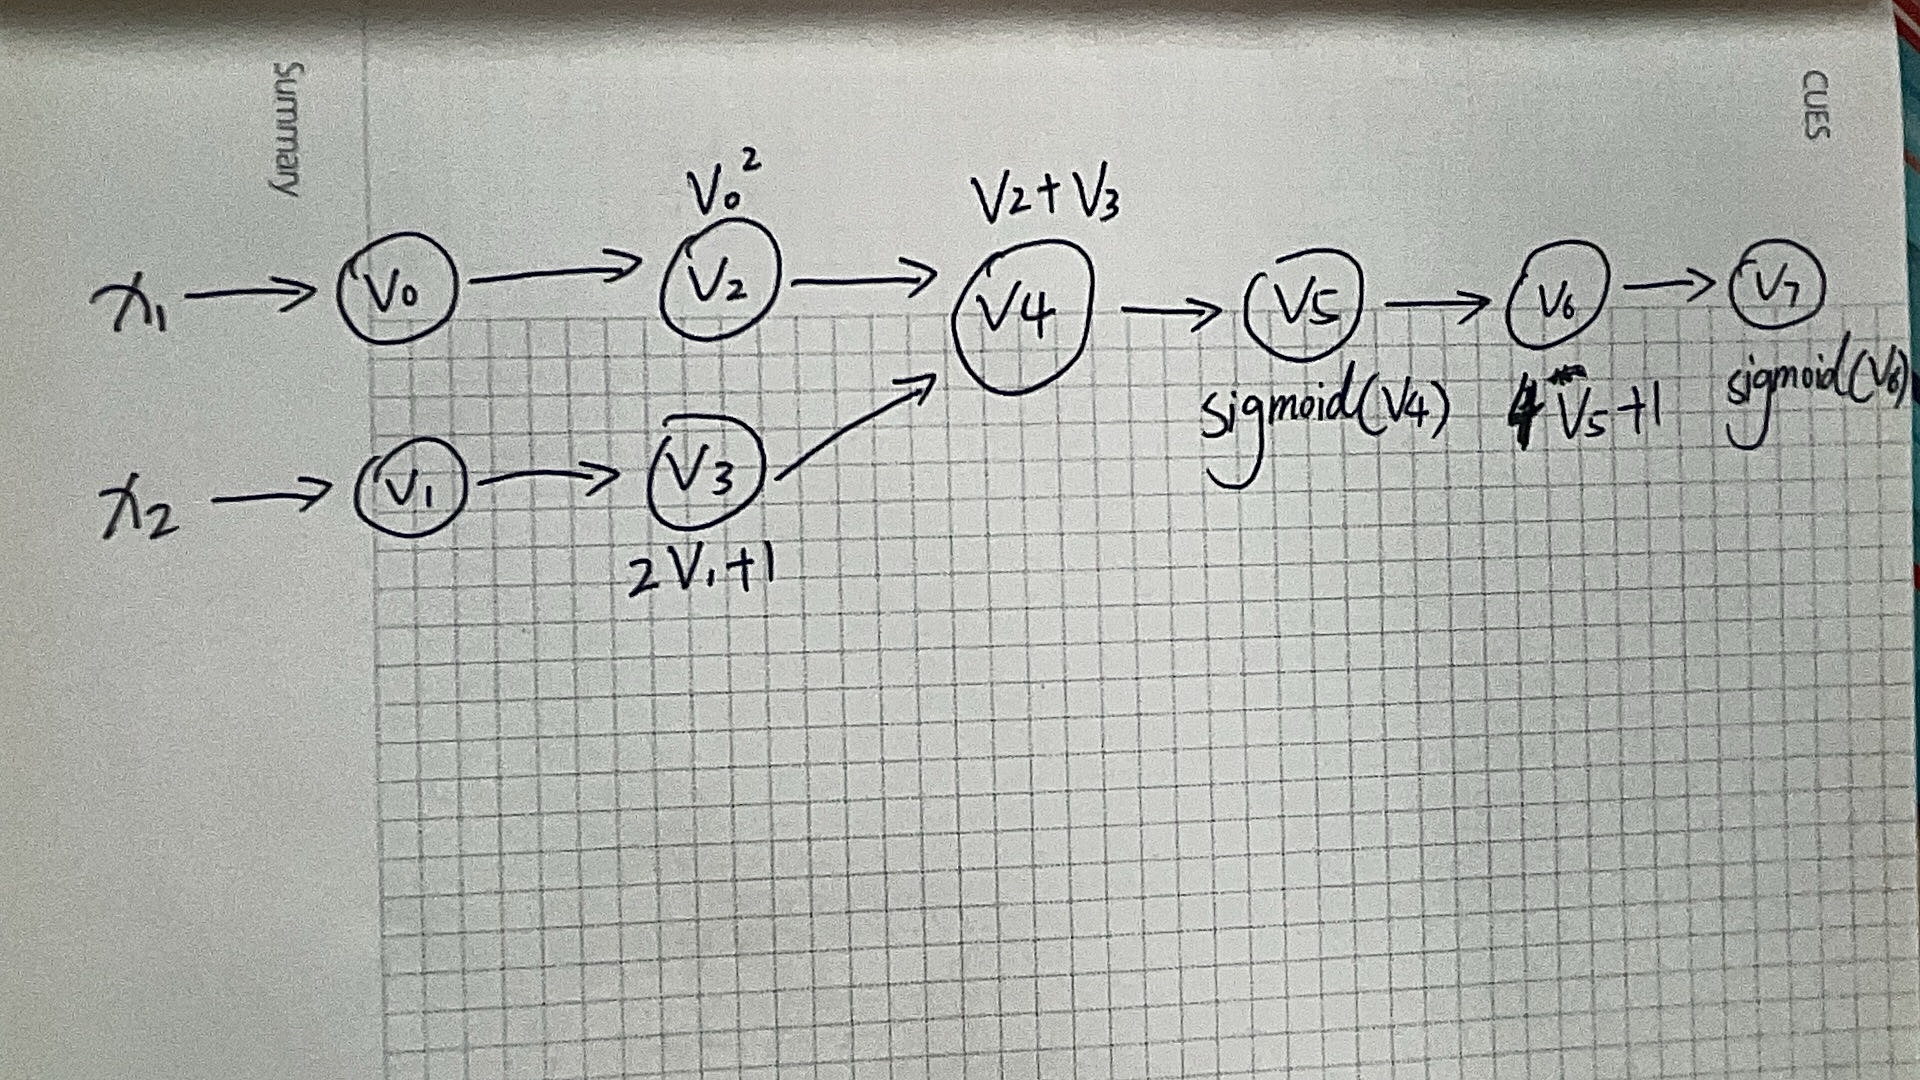

In [12]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [13]:
x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(0.0, requires_grad=True)

In [15]:
import torch

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# 定义变量
x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(0.0, requires_grad=True)

# 计算中间变量
v1 = x1**2 + 2*x2 + 1
v2 = sigmoid(v1)
v3 = 3*v2 + v2 + 1
y = sigmoid(v3)

# 创建节点字典
node_dict = {
    "v1": v1, "v2": v2, "v3": v3, "y": y,
    "x1": x1, "x2": x2
}

# 对y进行反向传播
y.backward(retain_graph=True)  # 保留计算图以便再次使用

# 打印每个节点对x1和x2的导数
for node_name in node_dict:
    node = node_dict[node_name]
    if node.grad is not None:
        print(f"节点{node_name}对x1的导数: {node.grad}")
    else:
        print(f"节点{node_name}对x1的导数: None")

# 重置梯度
x1.grad = None
x2.grad = None

# 再次对y进行反向传播，这次计算对x2的导数
y.backward(retain_graph=True)  # 保留计算图以便再次使用

# 打印每个节点对x2的导数
for node_name in node_dict:
    node = node_dict[node_name]
    if node.grad is not None:
        print(f"节点{node_name}对x2的导数: {node.grad}")
    else:
        print(f"节点{node_name}对x2的导数: None")

节点v1对x1的导数: None
节点v2对x1的导数: None
节点v3对x1的导数: None
节点y对x1的导数: None
节点x1对x1的导数: 0.008922361768782139
节点x2对x1的导数: 0.008922361768782139
节点v1对x2的导数: None
节点v2对x2的导数: None
节点v3对x2的导数: None
节点y对x2的导数: None
节点x1对x2的导数: 0.008922361768782139
节点x2对x2的导数: 0.008922361768782139


C:\Users\admin\AppData\Local\Temp/ipykernel_8764/1064495979.py:28: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  if node.grad is not None:
C:\Users\admin\AppData\Local\Temp/ipykernel_8764/1064495979.py:43: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. 